**Set environment**

In [47]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("GenomicRanges")))
suppressMessages(suppressWarnings(library("nullranges")))
suppressMessages(suppressWarnings(library("plyranges")))
suppressMessages(suppressWarnings(library("patchwork")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry = file.path(
    FD_RES, 
    "region_integration", 
    txt_region,
    "analysis_enrichment"
)
txt_fname = "region.prepare.covariate.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_covariate = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041      7


Chrom,ChromStart,ChromEnd,Region,ATAC,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.5955004,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.4535793,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.5832908,0.587859,313


In [45]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry = file.path(
    FD_RES, 
    "region_integration", 
    txt_region,
    "analysis_enrichment"
)
txt_fname = "region.prepare.fcc.tss.chipseq.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041    538


Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF,CRISPRi-Growth,CRISPR-E2G,TSS,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF1,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CBX8,CC2D1A,CCAR2,CCNT2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOS,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2B,GTF2E2,GTF2F1,GTF2I,GTF3C2,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGN3,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LARP7,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NFYB,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POLR3A,POLR3G,POU5F1,PPARD,PRDM10,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SP2,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,STAG1,STAT5A,STAT5B,SUPT5H,SUZ12,TAF1,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC4,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [17]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.fcc_peak_call.label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 155926     19


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Label3,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,10038,10405,chr1:10038-10405,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,10038,10405,chr1:10038-10405,Repress_GCFilter,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0


## Split the regions

In [18]:
dat = dat_region_annot_fcc
vec = c("Enhance", "Repress")
dat = dat %>% 
    dplyr::filter(Type %in% vec) %>% 
    dplyr::filter(Num_Assay > 1)
vec = dat$Region

dat_region_annot_fcc_subset = dat
vec_txt_region_subset = unique(vec)
print(length(vec))
print(dim(dat))
print(table(dat$Type))
print(table(dat$Label3))
fun_display_table(head(dat, 3))

[1] 18346
[1] 18346    19

Enhance Repress 
  16597    1749 

    Enhancer     Silencer TSS:Enhancer TSS:Silencer 
       11623         1640         4974          109 


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Label3,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,Enhancer,1,1,0,0,0,0,0,0
chr1,958722,959968,chr1:958722-959968,Enhance,2,1,0,Enhancer,Promoter,TSS:Enhancer,1,1,0,0,0,0,0,0
chr1,960468,961615,chr1:960468-961615,Enhance,2,1,0,Enhancer,Promoter,TSS:Enhancer,1,1,0,0,0,0,0,0


In [19]:
dat = dat_region_covariate
vec = dat$Region
vec_txt_region = vec
print(length(vec))

[1] 150041


In [20]:
dat = dat_region_annot_fcc_subset

lst = split(dat$Region, dat$Label3)
vec = setdiff(vec_txt_region, vec_txt_region_subset)
lst[["Background"]] = vec

lst = lapply(lst, function(vec){
    dat = dat_region_covariate
    dat = dat %>% dplyr::filter(Region %in% vec) %>% dplyr::distinct()
    return(dat)
})

lst_dat_region = lst

In [21]:
lst = lst_dat_region
lst = lapply(lst, function(dat){
    grg = GRanges(
        seqnames = dat$Chrom,
        ranges = IRanges(
            start = dat$ChromStart, 
            end   = dat$ChromEnd
        ),
        Region = dat$Region,
        ATAC   = dat$ATAC,
        pGC    = dat$pGC,
        Length = dat$Length
    )
    return(grg)
})

lst_grg_region = lst

## Prepare Matrix

In [46]:
dat = mat_region_annot_merge
dat = dat %>% column_to_rownames("Region")    

mat_region_annot_prepare = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041    537


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF,CRISPRi-Growth,CRISPR-E2G,TSS,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF1,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CBX8,CC2D1A,CCAR2,CCNT2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOS,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2B,GTF2E2,GTF2F1,GTF2I,GTF3C2,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGN3,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LARP7,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NFYB,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POLR3A,POLR3G,POU5F1,PPARD,PRDM10,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SP2,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,STAG1,STAT5A,STAT5B,SUPT5H,SUZ12,TAF1,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC4,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Test

In [24]:
lst = lst_grg_region
vec = names(lst)
vec_txt_group = vec
print(vec)

[1] "Enhancer"     "Silencer"     "TSS:Enhancer" "TSS:Silencer" "Background"  


In [25]:
dat = mat_region_annot_prepare
vec = colnames(dat)
vec_txt_feature = vec

print(length(vec))
print(head(vec))

[1] 537
[1] "ASTARR_A" "WSTARR_A" "LMPRA_A"  "TMPRA_A"  "ASTARR_R" "WSTARR_R"


In [26]:
lst_outer = list()
for (txt_group in vec_txt_group){
    ### show progress
    cat(txt_group, "\n")
    flush.console()
    
    ### Match ranges
    set.seed(123)
    mgr = matchRanges(
        focal = lst[[txt_group]],
        pool  = lst[["Background"]],
        covar = ~ ATAC + pGC
    )
    
    ### Extract
    dat  = mat_region_annot_prepare
    vec1 = focal(mgr)$Region
    vec2 = matched(mgr)$Region
    dat1 = dat[vec1,]
    dat2 = dat[vec2,]
    dat1$Label_Group = 1
    dat2$Label_Group = 0

    ### Combine
    dat = bind_rows(dat1, dat2)
    mat_region_annot_test = dat

    ### init loop
    lst_inner = list()
    for (txt_feature in vec_txt_feature){

        ###
        dat = mat_region_annot_test
        dat[,"Label_Feature"] = dat[,txt_feature]
        dat = dat %>% 
            dplyr::select(Label_Group, Label_Feature) %>% 
            dplyr::mutate(
                Label_Group   = factor(Label_Group,   levels = c(0,1)),
                Label_Feature = factor(Label_Feature, levels = c(0,1))
            )

        ###
        mat = table(dat$Label_Group, dat$Label_Feature)
        mat = mat + 1
        fit = fisher.test(mat)

        ###
        lst_inner[[txt_feature]] = fit
    }
    ###
    lst_outer[[txt_group]] = lst_inner
}

lst_fit_fisher = lst_outer

Enhancer 
Silencer 
TSS:Enhancer 
TSS:Silencer 
Background 


## Summary

In [27]:
lst_outer = lst_fit_fisher

lst = lapply(lst_outer, function(lst_inner){
    lst = lapply(lst_inner, function(fit){
        res = c(fit$estimate, fit$p.value)
        names(res) = c("OddsRatio", "Pval")
    return(res)
    })
    
    dat = bind_rows(lst, .id = "Feature")
    return(dat)
})
dat = bind_rows(lst, .id = "Group")
dat = dat %>% 
    dplyr::mutate(Log2OR  = log2(OddsRatio)) %>%
    dplyr::mutate(PvalAdj = p.adjust(Pval, method = "BH")) %>%
    dplyr::mutate(NLog10P = -log10(PvalAdj))
                            
dat_res_fisher = dat
print(dim(dat))
head(dat)

[1] 2685    7


Group,Feature,OddsRatio,Pval,Log2OR,PvalAdj,NLog10P
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,ASTARR_A,24.3636016,0.000000e+00,4.606656,0.000000e+00,Inf
Enhancer,WSTARR_A,35.0687432,0.000000e+00,5.132114,0.000000e+00,Inf
Enhancer,LMPRA_A,18.0117525,0.000000e+00,4.170867,0.000000e+00,Inf
Enhancer,TMPRA_A,7.0633278,3.609441e-44,2.820348,3.365052e-43,42.473008
Enhancer,ASTARR_R,0.1824773,0.000000e+00,-2.454211,0.000000e+00,Inf
Enhancer,WSTARR_R,0.2523958,1.221106e-08,-1.986240,5.410345e-08,7.266775


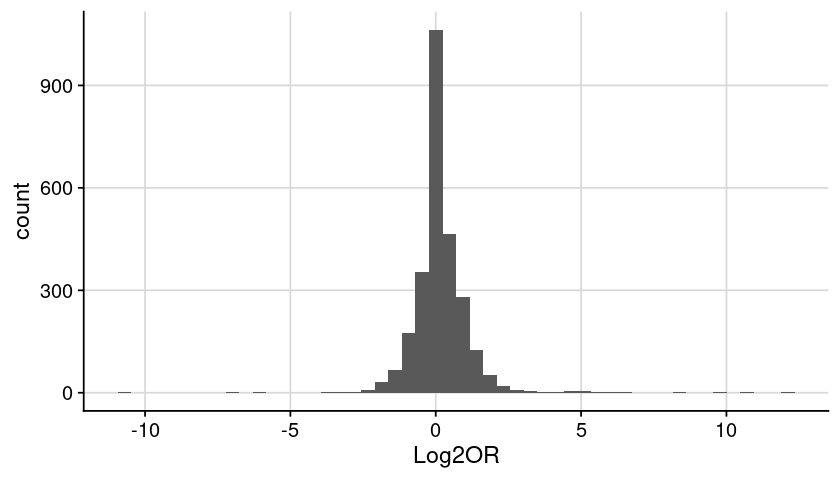

In [28]:
dat = dat_res_fisher
gpt = ggplot(dat, aes(x = Log2OR)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width=7)
print(gpt)

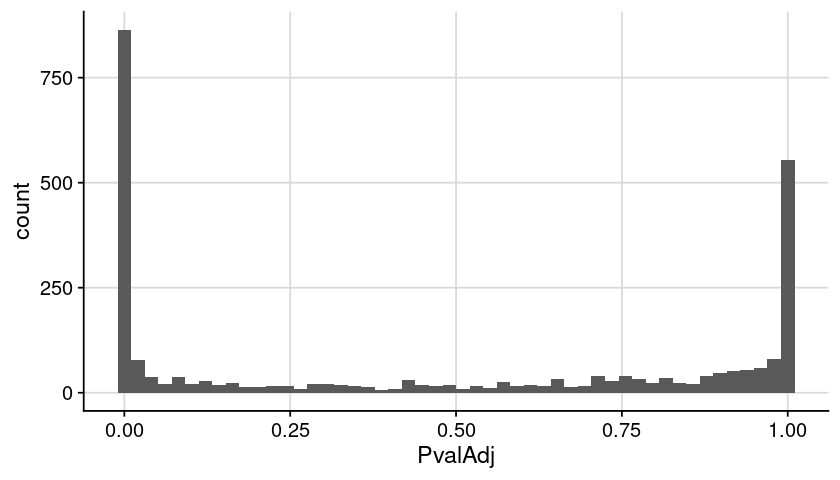

In [29]:
dat = dat_res_fisher
gpt = ggplot(dat, aes(x = PvalAdj)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width=7)
print(gpt)

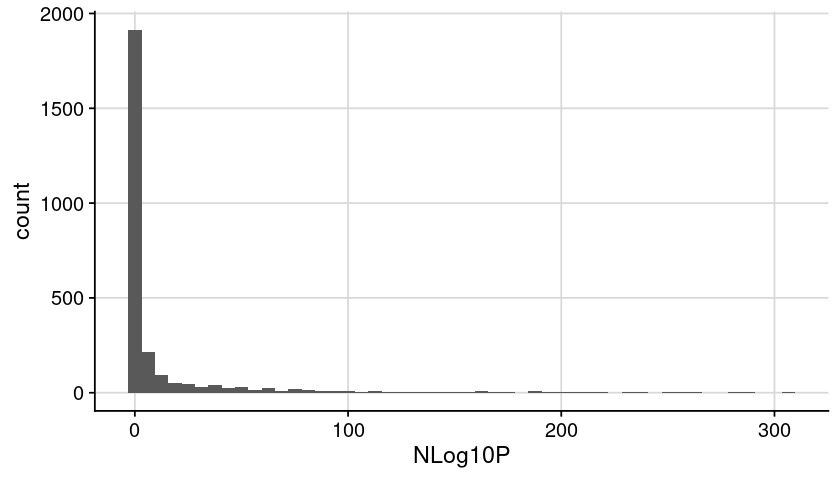

In [30]:
dat = dat_res_fisher
dat = dat %>% dplyr::filter(!is.infinite(NLog10P))
gpt = ggplot(dat, aes(x = NLog10P)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width=7)
print(gpt)

## Visualization

In [34]:
vec_txt_feature_subset = c(
    "CTCF", "SMC3", "RAD21",
    "TSS", 
    "POLR2A", "EP300", 
    "EZH2", "REST", "SIN3A",
    'H3K27ac', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3')

In [68]:
dat = dat_res_fisher
dat = dat %>% 
    dplyr::mutate(Log2OR = ifelse(is.infinite(Log2OR), 1000, Log2OR)) %>%
    dplyr::select(Group, Feature, Log2OR) %>% 
    tidyr::spread(Feature, Log2OR) %>%
    column_to_rownames(var = "Group")

dat_res_log2or = dat
head(dat)

,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Background,-0.005980789,-0.01328886,0.03255384,-0.05681987,0.006742782,0.008174969,0.007149829,0.02885085,-0.004373991,-0.03478435,⋯,0.05663193,-0.04370854,0.1369052,-0.04959414,0.00329258,0.01426152,0.0009700023,-0.02410041,0.00370576,0.01324233
Enhancer,0.589957028,0.86297109,-0.95872175,0.28754499,1.293784511,-0.632562621,0.717551662,0.39958720,-0.042210281,0.78098276,⋯,0.76379004,0.62276943,1.4324667,1.44012614,0.99017116,0.24129180,-0.1864885400,0.26917036,1.22688998,-0.22140217
Silencer,-0.421600416,1.32338493,-0.15479464,0.00000000,-0.013307716,0.638554391,-0.058396918,-0.40114571,0.420467908,-0.43518021,⋯,1.00057809,-0.22320529,2.0020098,0.00000000,0.80940530,-1.05334382,-0.6858600383,-0.33208959,-0.14611812,-0.85126510
TSS:Enhancer,-0.204489954,0.88859495,0.44704995,0.39833815,-0.186554205,-0.174555460,-0.416449830,0.16960289,1.456691908,0.28363112,⋯,-1.16209436,0.05492003,-0.8073284,0.12320192,0.34619891,0.78029407,0.4177918768,0.45588667,0.26306924,1.82248889
TSS:Silencer,-0.456042695,0.56411358,-0.34786537,0.27546304,-0.379196482,-0.129530113,0.000000000,-0.16546779,0.313915908,-0.63575480,⋯,0.00000000,0.76054397,-1.0087705,-0.59558944,-1.58006104,-0.94062092,-0.5412769328,-0.13723698,0.20565328,-1.02224351


In [69]:
dat = dat_res_fisher
dat = dat %>% 
    dplyr::mutate(NLog10P = ifelse(is.infinite(NLog10P), 1000, NLog10P)) %>%
    dplyr::select(Group, Feature, NLog10P) %>% 
    tidyr::spread(Feature, NLog10P) %>%
    column_to_rownames(var = "Group")

dat_res_nlogp = dat
head(dat)

,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Background,0.00000000,0.05530882,0.18263078,0.1706307,0.03908983,0.006748278,0.000000,0.03191204,0.0000000,0.4886910,⋯,0.000000,0.01733809,0.1608026,0.1280152,0.000000,0.0123887,0.00000000,0.1826308,0.000000,0.00000000
Enhancer,23.39876620,74.67526699,23.86040476,1.2543314,246.51569745,16.493822141,39.668482,2.90393328,0.1363573,63.1039690,⋯,0.863628,2.74616527,7.6737257,44.0647395,61.862460,2.2263039,0.86739503,5.7101760,43.207591,0.49063967
Silencer,0.62029759,11.39568777,0.04247794,0.0000000,0.00000000,1.681764068,0.000000,0.13020477,1.2902455,0.7110684,⋯,0.000000,0.00000000,0.1804508,0.0000000,2.104610,1.6571348,0.38872973,0.3767618,0.000000,0.14641317
TSS:Enhancer,1.66038722,50.75417333,10.45473553,3.3890933,2.34723264,1.048898307,6.750149,0.75044156,113.2677819,5.2550122,⋯,1.278784,0.00541457,1.3544898,0.1837133,5.932776,30.6212346,7.60071510,13.4876491,2.035816,76.55955345
TSS:Silencer,0.03881095,0.23203052,0.08559024,0.0000000,0.12440740,0.000000000,0.000000,0.00000000,0.1039731,0.2093076,⋯,0.000000,0.01733809,0.0000000,0.0000000,1.362860,0.5390075,0.09371179,0.0000000,0.000000,0.02988695


In [70]:
dat = dat_res_fisher
vec = dat$Log2OR
idx = is.infinite(vec)
vec = vec[!idx]
print(sum(idx))
summary(vec)

[1] 0


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-10.510906  -0.196174   0.007151   0.153465   0.514598  12.311451 

In [71]:
vec_num_breaks = seq(-2.5, 2.5, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

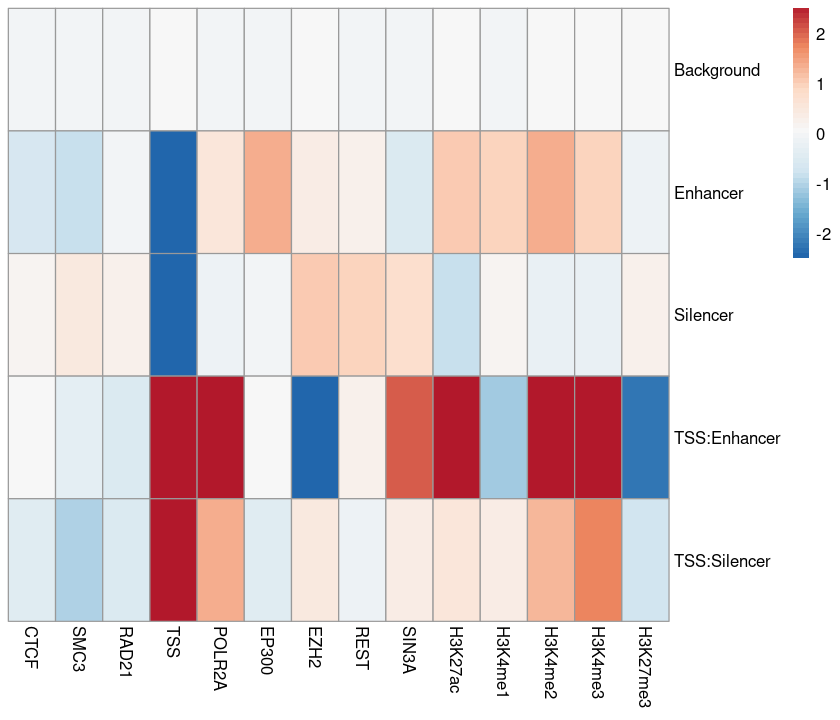

In [72]:
vec = vec_txt_feature_subset
dat = dat_res_log2or
dat = dat[, vec]

options(repr.plot.height = 6, repr.plot.width=7)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

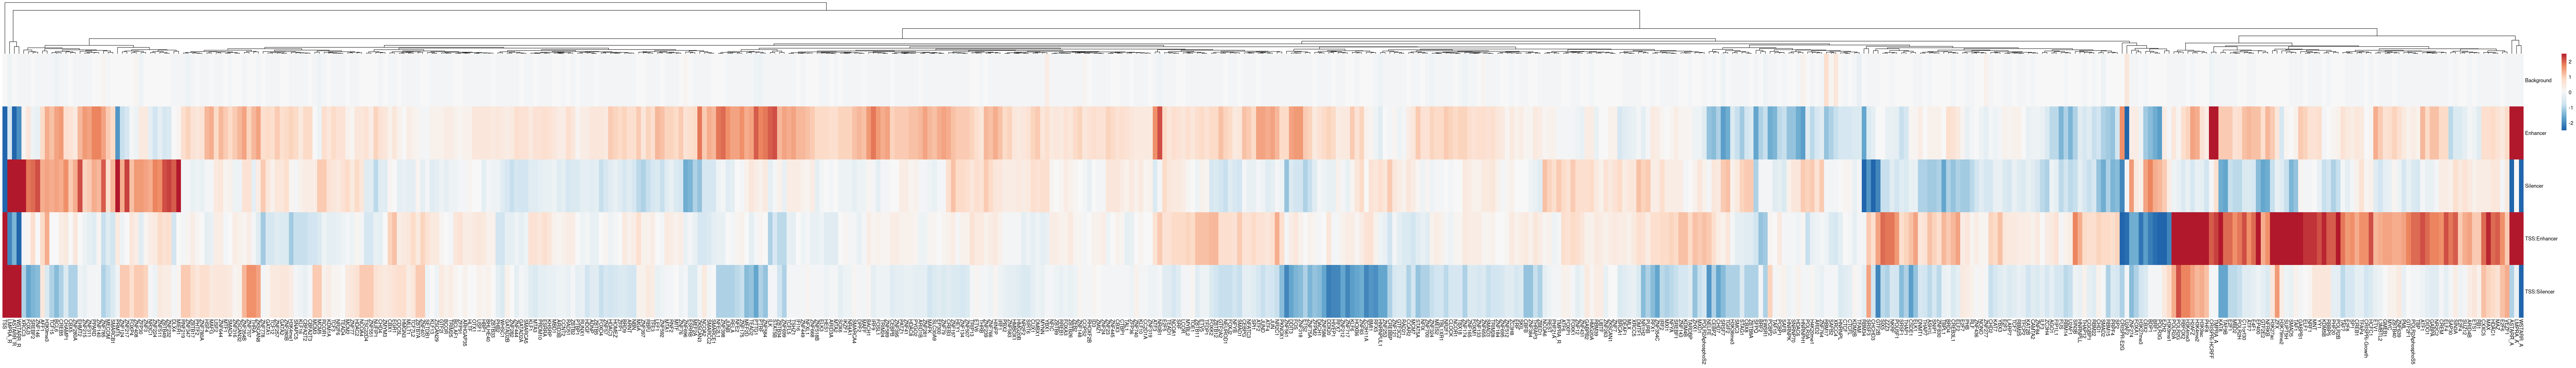

In [73]:
dat = dat_res_log2or

options(repr.plot.height = 10, repr.plot.width  =70)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = TRUE,
    treeheight_col = 100
)

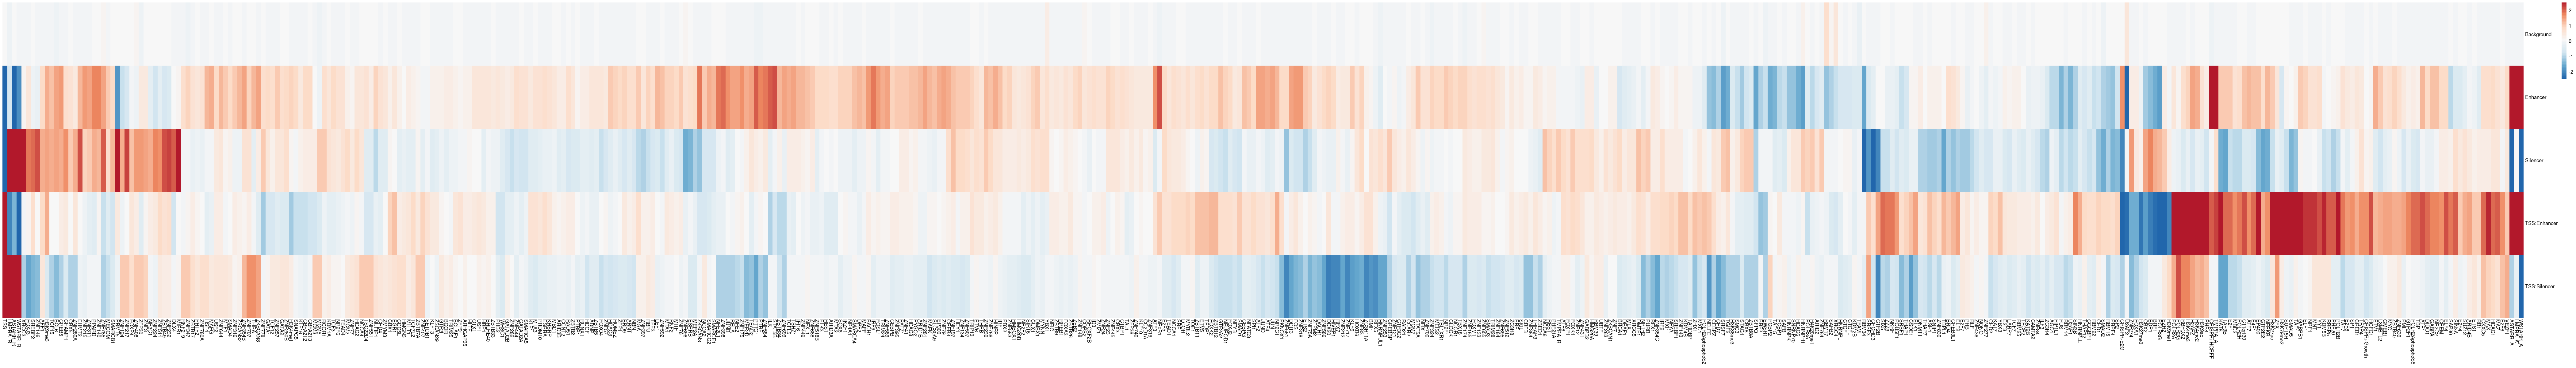

In [74]:
dat = dat_res_log2or

options(repr.plot.height = 10, repr.plot.width  =70)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = TRUE,
    treeheight_col = 0
)

In [75]:
dat = dat_res_fisher
vec = dat$NLog10P
idx = is.infinite(vec)
vec = vec[!idx]
print(sum(idx))
summary(vec)

[1] 17


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00000   0.01734   0.33278  14.45545   4.98725 306.51603 

In [91]:
vec_num_breaks = seq(0, 100, by = 0.1)

vec = brewer.pal(n = 7, name = "Greys")
vec = c("#FFFFFF", vec)
vec = colorRampPalette(vec)(length(vec_num_breaks))
vec_txt_colors = vec

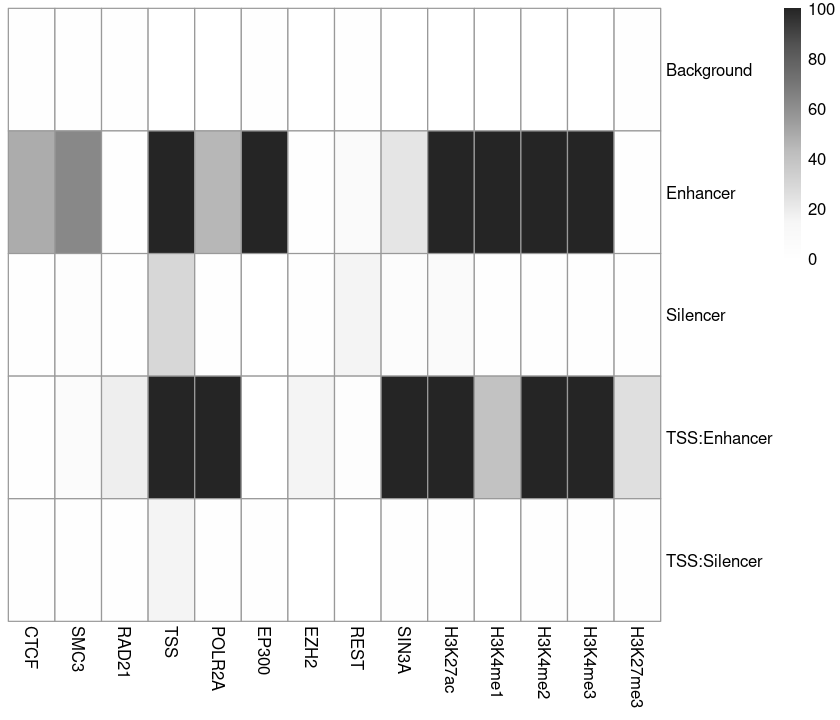

In [92]:
vec = vec_txt_feature_subset
dat = dat_res_nlogp
dat = dat[, vec]

options(repr.plot.height = 6, repr.plot.width=7)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

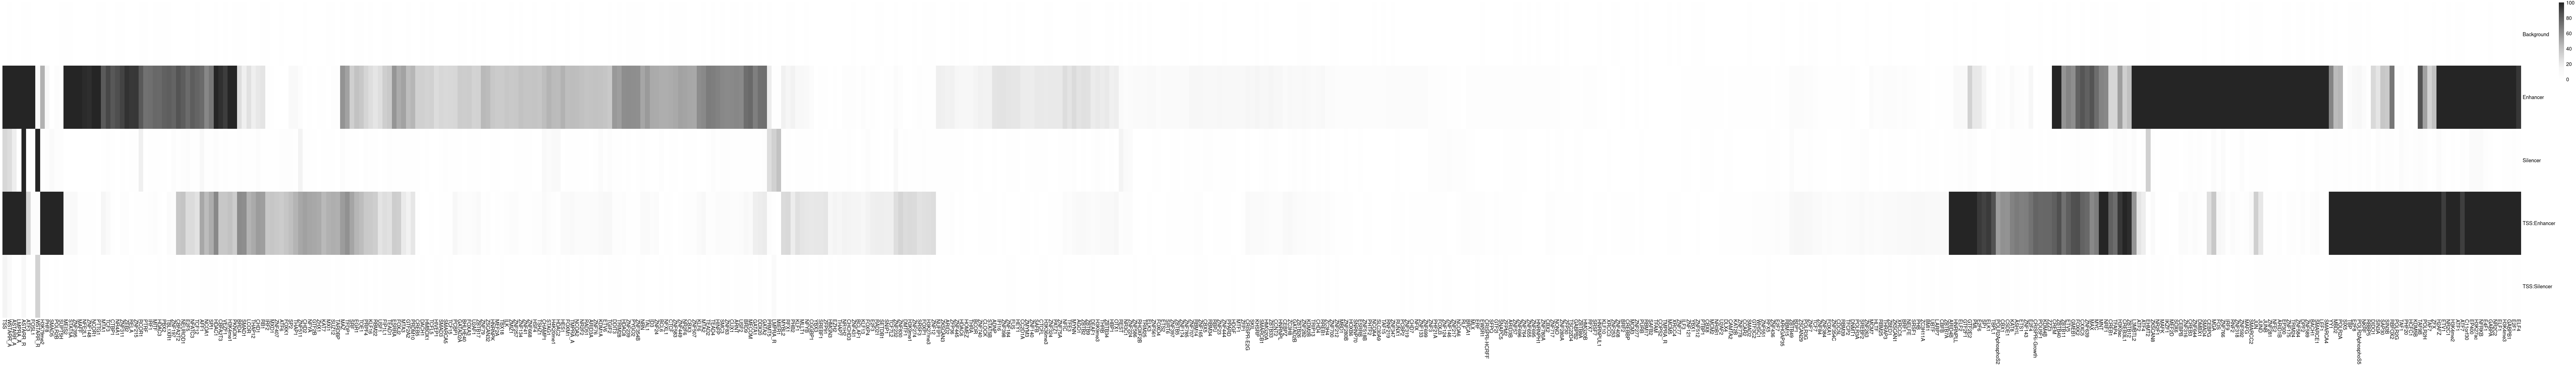

In [93]:
dat = dat_res_nlogp

options(repr.plot.height = 10, repr.plot.width  =70)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = TRUE,
    treeheight_col = 0
)

In [61]:
dat = dat_res_fisher
dat = dat %>% dplyr::filter(NLog10P > 10)
vec = unique(dat$Feature)
print(length(vec))

[1] 398
